<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/26_4_Train_for_FastAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В домашней работе вам необходимо с помощью FastAPI реализовать REST API:

На 5 баллов. Творческое задание. REST API можно использовать для взаимодействия с вашей моделью нейронной сети. Вы уже знаете, что можно обучить модель, а лучший результат выгрузить для дальнейшего использования. Для получения 5 баллов необходимо обучить свою модель, загрузить ее в Colab. Задача может быть любой: регрессии, классификации, входными данными могут быть картинки или текстовые данные. С помощью REST API обеспечьте взаимодействие с моделью. Это полностью творческое задание!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras

Mounted at /content/drive


In [3]:
file_excel = '/content/drive/MyDrive/DS.xlsx'
data = pd.read_excel(file_excel)

In [4]:
data.head(3)

,Data,Val_plan,Val_fact,Tovar_plan,Tovar_fact,Tovar_nesvar,Tovar_svar,Transneft,Sborka_chel,Svarka_chel
0,2020-12-01,2050.32,1752.0,2064.79,2014.4,1062.9,951.4,0,506.9,568.9
1,2021-01-01,1930.73,1623.0,1914.79,1690.8,999.9,690.8,0,429.9,460.9
2,2021-02-01,1961.80,1683.8,1938.32,1787.9,1251.3,536.5,0,361.9,400.9


In [40]:
x_data = data[['Tovar_svar', 'Sborka_chel', 'Svarka_chel', 'Transneft', 'Tovar_nesvar']]

In [41]:
y_data = data[['Tovar_fact']]

In [42]:
x_data.tail(3)

,Tovar_svar,Sborka_chel,Svarka_chel,Transneft,Tovar_nesvar
84,412.6,411.2,430.2,0,1090.2
85,599.9,462.2,495.2,1,743.9
86,597.1,453.2,519.2,0,512.1


In [43]:
y_data.head(3)

,Tovar_fact
0,2014.4
1,1690.8
2,1787.9


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [47]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(5,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='linear'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 20)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
EPOCHS = 500
BATCH_SIZE = 43
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.05)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 403453.9375 - mae: 515.6827 - val_loss: 51492.6562 - val_mae: 222.8461
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 393205.3438 - mae: 500.2890 - val_loss: 59538.4570 - val_mae: 240.1300
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 300457.6875 - mae: 427.6142 - val_loss: 60256.0078 - val_mae: 241.6222
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 381262.5000 - mae: 485.4862 - val_loss: 62411.2969 - val_mae: 246.0294
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 386685.7188 - mae: 506.4049 - val_loss: 64468.4453 - val_mae: 250.1590
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 380838.8438 - mae: 501.9877 - val_loss: 64012.6875 - val_mae: 249.2526
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 311276.1875 - mae: 452.9207 - val_loss: 63321.2383 - val_mae: 247.8665
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 357046.8750 - mae: 507.2652 - val_loss

In [52]:
model.save("/content/drive/MyDrive/Best_Models/OEMZ.keras")

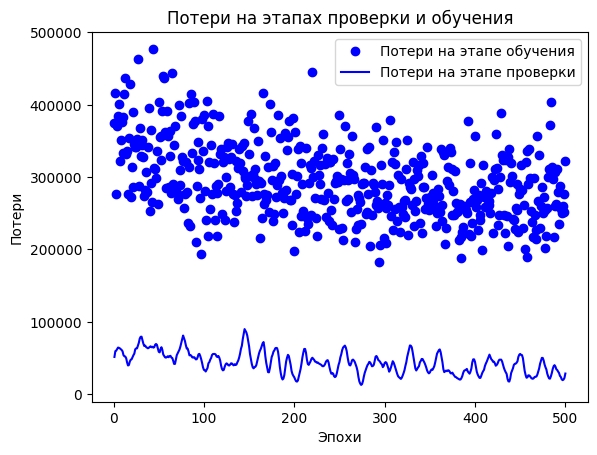

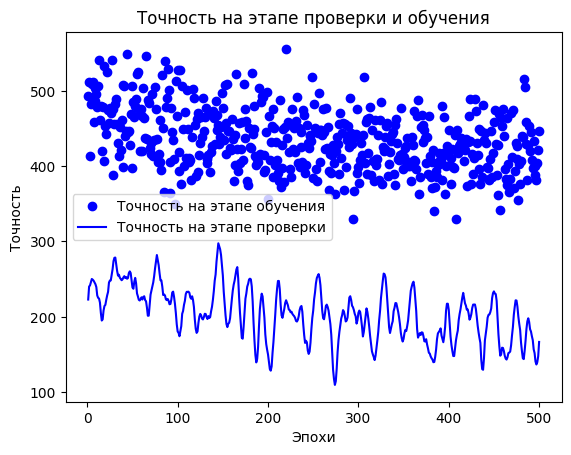

In [55]:
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['mae'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_mae'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()
print()

In [56]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 21381.1035 - mae: 141.3800


In [57]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Best_Models/OEMZ.keras')

In [58]:
model_loaded.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 21381.1035 - mae: 141.3800


[21381.103515625, 141.38002014160156]

In [59]:
file_user = '/content/drive/MyDrive/test_DS.xlsx'
data_user = pd.read_excel(file_user)

In [19]:
data_user

,Data,Val_plan,Val_fact,Tovar_plan,Tovar_fact,Tovar_nesvar,Tovar_svar,Transneft,Sborka_chel,Svarka_chel
0,2023-04-01,2382.5355,2421.785,2481.033,2374.06,1365.51,1008.55,0,492.2,683.1


In [60]:
data_user = data_user[['Tovar_svar', 'Sborka_chel', 'Svarka_chel', 'Transneft', 'Tovar_nesvar']]

In [61]:
data_user

,Tovar_svar,Sborka_chel,Svarka_chel,Transneft,Tovar_nesvar
0,1008.55,492.2,683.1,0,1365.51


In [66]:
y_pred=model_loaded.predict(data_user)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[2140.0874]]
